
## **Early stage diabetes risk prediction using machine learning approach**

---

**Data** **Set** **Information**:
This has been collected using direct questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet, Bangladesh and approved by a doctor. 

Source:

1. M M Faniqul Islam,
2. Rahatara Ferdousi,
3.Sadikur Rahman,
and Humayra
4.Yasmin Bushra
https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

relevant papers https://link.springer.com/chapter/10.1007/978-981-13-8798-2_12



**Attributes**

Age 1.16-90

Sex 1. Male, 2.Female

Polyuria 1.Yes, 2.No.

Polydipsia 1.Yes, 2.No.

sudden weight loss 1.Yes, 2.No.

weakness 1.Yes, 2.No.

Polyphagia 1.Yes, 2.No.

Genital thrush 1.Yes, 2.No.

visual blurring 1.Yes, 2.No.

Itching 1.Yes, 2.No.

Irritability 1.Yes, 2.No.

delayed healing 1.Yes, 2.No.

partial paresis 1.Yes, 2.No.

muscle stiness 1.Yes, 2.No.

Alopecia 1.Yes, 2.No.

Obesity 1.Yes, 2.No.

Class 1.Positive (diabetic), 2.Negative (Non diabetic)







Road map
1. State the question and determine required data
2. Acquire the data in an accessible format
3. Identify and correct missing data points/anomalies as required
4. Prepare the data for the machine learning model




# **The study question: How can both common and less common symptoms of diabetes be utilized for its early prediction?**

In [1]:
#upload data from local storage
from google.colab import files
uploaded = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [50]:
#import pandas, read in data and display first five rows

import pandas as pd

df= pd.read_csv('diabetes_data_upload.csv', skipinitialspace=True, header=0)

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [51]:
print('The shape of our features is:', df.shape)

The shape of our features is: (520, 17)


**The information is in the tidy data format with each row forming one observation, with the variable values in the columns.** **The shape of the feature is (520,17)** 

In [52]:
#print concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [53]:
#descriptive statistics
df.describe(include= object)

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [54]:
#descriptive statistics for the age attribute (integer)

df.describe(include= int)

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


**All the attributes except Age have categorical data with two unique outcomes. The ages of the patients ranged between 16 and 90 years. There are no missing values in the data set.**  

In [55]:
#find how the percentage of patients with diabetes

df_class = (pd.crosstab(index = df['class'], columns='count', normalize= True)
)*100
df_class

col_0,count
class,
Negative,38.461538
Positive,61.538462


**38.5% of the patients didn't not have diabetes and 61.5% had diabetes.**

In [56]:
#distribution of Gender in the dataset

df_gender = (pd.crosstab(index = df['Gender'], columns='count', normalize= True)
)*100
df_gender

col_0,count
Gender,
Female,36.923077
Male,63.076923


In [57]:
joint_genderclass = (pd.crosstab(df['Gender'], df['class'], normalize= 'index',))*100

joint_genderclass

class,Negative,Positive
Gender,,
Female,9.895833,90.104167
Male,55.182927,44.817073


**90% of the women had diabetes while 44% of the men had diabetes.**

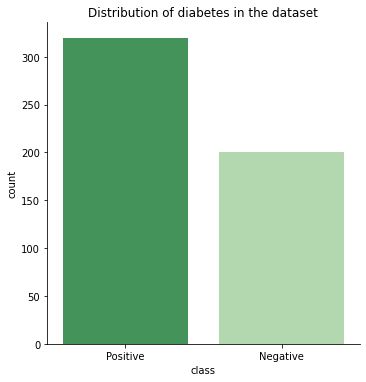

In [58]:
#visualization for distribution of diabetes in the sample

import seaborn as sns


sns.catplot(x='class', kind="count", palette="Greens_r", data=df)

import matplotlib.pyplot as plt
plt.title('Distribution of diabetes in the dataset')

plt.show()

**61.5% of the patients had diabetes and 38.5% didn't have diabetes.** 

In [59]:
df_age= df['Age']

df_age.head()

0    40
1    58
2    41
3    45
4    60
Name: Age, dtype: int64

In [60]:
#delete numerical data (age) and change the remaining categorical data into numeric data set that can be manipulated and fed into machine learning models

del df ['Age']

In [61]:
#change df into a numeric data


from sklearn import preprocessing
import pandas as pd

label = preprocessing.LabelEncoder()

def Categorical_label (col):
  
  return label.fit(col).transform(col)


df= df.apply(Categorical_label)

df.head()


,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [62]:
#check info to ensure that dataframe was properly converted.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Gender              520 non-null    int64
 1   Polyuria            520 non-null    int64
 2   Polydipsia          520 non-null    int64
 3   sudden weight loss  520 non-null    int64
 4   weakness            520 non-null    int64
 5   Polyphagia          520 non-null    int64
 6   Genital thrush      520 non-null    int64
 7   visual blurring     520 non-null    int64
 8   Itching             520 non-null    int64
 9   Irritability        520 non-null    int64
 10  delayed healing     520 non-null    int64
 11  partial paresis     520 non-null    int64
 12  muscle stiffness    520 non-null    int64
 13  Alopecia            520 non-null    int64
 14  Obesity             520 non-null    int64
 15  class               520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB


In [63]:
#Add the age back to the dataset.

df['Age']= df_age

df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,40
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,58
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,41
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,45
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,60


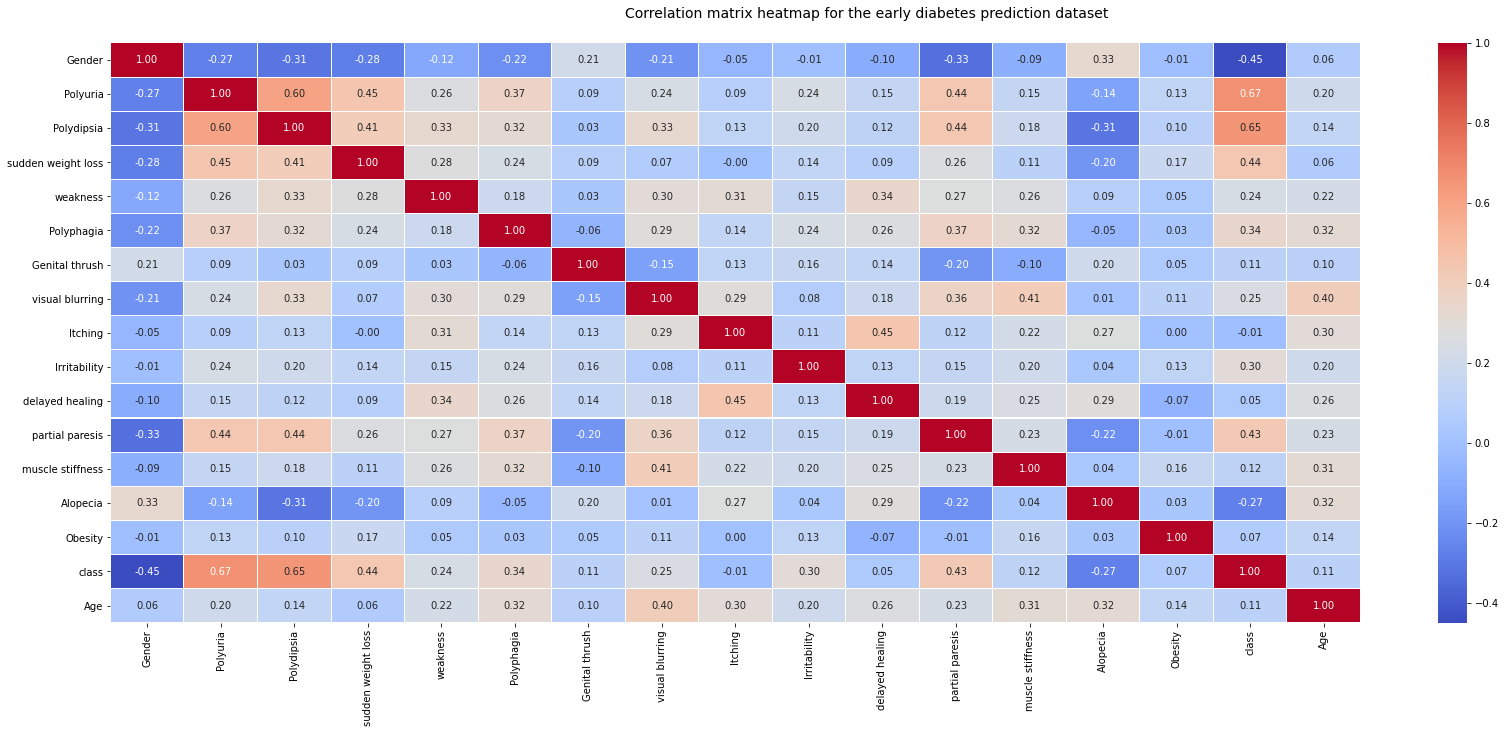

In [64]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(28, 10))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation matrix heatmap for the early diabetes prediction dataset', fontsize=14)

**Polyuria and Polydispsia had the highest correlation with diabetes, with correlations of 0.67 and 0.65 respectively. Delayed healing and itching had the lowest correlation with diabetes, with correlations of -0.01 and 0.05 respectively. Most of the the attributes had a low correlation with diabetes.**

In [65]:

# change the Age attribute to categorical data (1.15–25, 2. 26-35, 3.36–45, 4.46–55,5.56–65, 6.above 65) and observe if age groups are associated with diabetes.

Category= pd.cut (df['Age'], bins=[15,25,35,45,55,65,90], labels=['1', '2', '3', '4', '5','6'])

df.insert(7, 'Age Group', Category)

In [66]:
#check if Age group was inserted correctly. 

df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,Age Group,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age
0,1,0,1,0,1,0,0,3,0,1,0,1,0,1,1,1,1,40
1,1,0,0,0,1,0,0,5,1,0,0,0,1,0,1,0,1,58
2,1,1,0,0,1,1,0,3,0,1,0,1,0,1,1,0,1,41
3,1,0,0,1,1,1,1,3,0,1,0,1,0,0,0,0,1,45
4,1,1,1,1,1,1,0,5,1,1,1,1,1,1,1,1,1,60


In [67]:
#Check if all ages are grouped

df.isnull().sum()

Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
Age Group             0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
Age                   0
dtype: int64

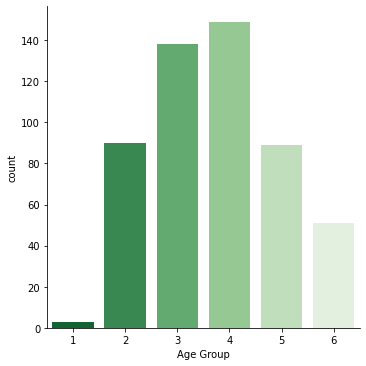

In [68]:
#Is there a relationship between age group and diabetes?

#plot the a bar group to see the distribution of age group.

import seaborn as sns


sns.catplot(x='Age Group', kind="count", palette="Greens_r", data=df)

import matplotlib.pyplot as plt

plt.show()

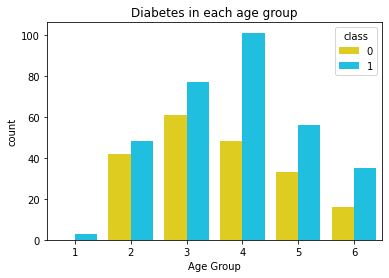

In [69]:
#Plot the distribution of diabetes within the age group attribute

sns.countplot(x = 'Age Group', hue = 'class', data = df, palette = 'jet_r')
plt.title('Diabetes in each age group')
plt.show()



**There is no relationship between diabetes and age group**

In [70]:
#age group and class distribution percentages

joint_ = (pd.crosstab(df['Age Group'], df['class'], normalize= True,))*100

joint_

class,0,1
Age Group,,
1,0.000000,0.576923
2,8.076923,9.230769
3,11.730769,14.807692
4,9.230769,19.423077
5,6.346154,10.769231
6,3.076923,6.730769


In [71]:
# Perform the chi-square test for age and diabetes


from scipy.stats import chi2_contingency


g1, p_val1, dof1, expctd1 = chi2_contingency(pd.crosstab(df['Age Group'], df['class']))

print(p_val1)

0.07614082388017705


**p=0.076. P value is greater than 0.05. We fail to reject the null hypothesis that there is no relationship between age group and diabetes.**

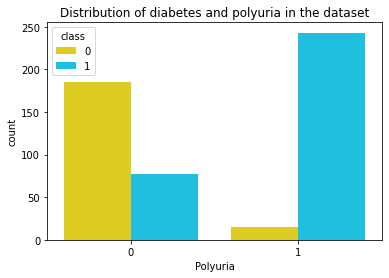

In [72]:
#distribution of diabetes in patients who had polyuria

sns.countplot(x = 'Polyuria', hue = 'class', data = df, palette = 'jet_r')
plt.title('Distribution of diabetes and polyuria in the dataset')
plt.show()

In [73]:
# Perform the chi-square test. Is there relationship between Polyuria and Diabetes?


from scipy.stats import chi2_contingency


g, p_val, dof, expctd = chi2_contingency(pd.crosstab(df['Polyuria'], df['class']))

print(p_val)

1.7409117803442155e-51


**Because p-value is 0.01< 0.05, We reject the null hypothesis at 0.05 significance and conclude that there is a relationship between polyuria and diabetes.**

In [74]:
#delete age group get dataframe ready for machine learning model

del df['Age Group']



In [75]:
df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,40
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,58
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,41
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,45
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,60


In [76]:
#rearrange data frame to its original state

del df['Age']

In [77]:
col_name= 'Age'

df.insert(0, col_name, df_age)



In [78]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [79]:
#uSING MULTI LAYER PERCEPRON TO PREDICT DIABETES

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

In [80]:
# Takes first 16 columns and assign them to variable "X"
X = df.iloc[:, 0:15]
# Takes first 17th columns and assign them to variable "Y".
y = df['class']

In [81]:
# Now for train and test split (80% of  dataset into  training set and  other 20% into test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [82]:
# Feature scaling
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [83]:
# Finally for the MLP- Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=1000)  
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(11, 11, 11), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

**Three hidden layers of size 11 each were utilized.**

In [84]:
predictions = mlp.predict(X_test)
print(predictions)

[0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1]


In [85]:
# Last thing: evaluation of algorithm performance in classifying diabetes
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

[[45  1]
 [ 5 53]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        46
           1       0.98      0.91      0.95        58

    accuracy                           0.94       104
   macro avg       0.94      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



**The MLP machine model predicted diabetes with a 94% accurancy. Out of 104 samples only 6 patients were mis-classified. ** **MLP machine learning model can be used for predicting diabetes at an early state because it of its accurance**

